In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Attempt to read the CSV file with a different encoding
df = pd.read_csv(r"C:\Users\kamos\OneDrive\Desktop\Global_Food_prices\wfp_market_food_prices.csv", encoding='ISO-8859-1')

# Display the first few rows of the DataFrame to confirm successful loading
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [3]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display the number of missing values and duplicate rows
missing_values, duplicate_rows

(adm0_id                   0
 adm0_name                 0
 adm1_id                   0
 adm1_name             13949
 mkt_id                    0
 mkt_name                  0
 cm_id                     0
 cm_name                   0
 cur_id                    0
 cur_name                  0
 pt_id                     0
 pt_name                   0
 um_id                     0
 um_name                   0
 mp_month                  0
 mp_year                   0
 mp_price                  0
 mp_commoditysource        0
 dtype: int64,
 0)

In [4]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Examine unique values in key columns
unique_countries = df['adm0_name'].nunique()
unique_commodities = df['cm_name'].nunique()
unique_markets = df['mkt_name'].nunique()
unique_years = df['mp_year'].nunique()

# Display the unique values
unique_countries, unique_commodities, unique_markets, unique_years

(74, 321, 1449, 26)

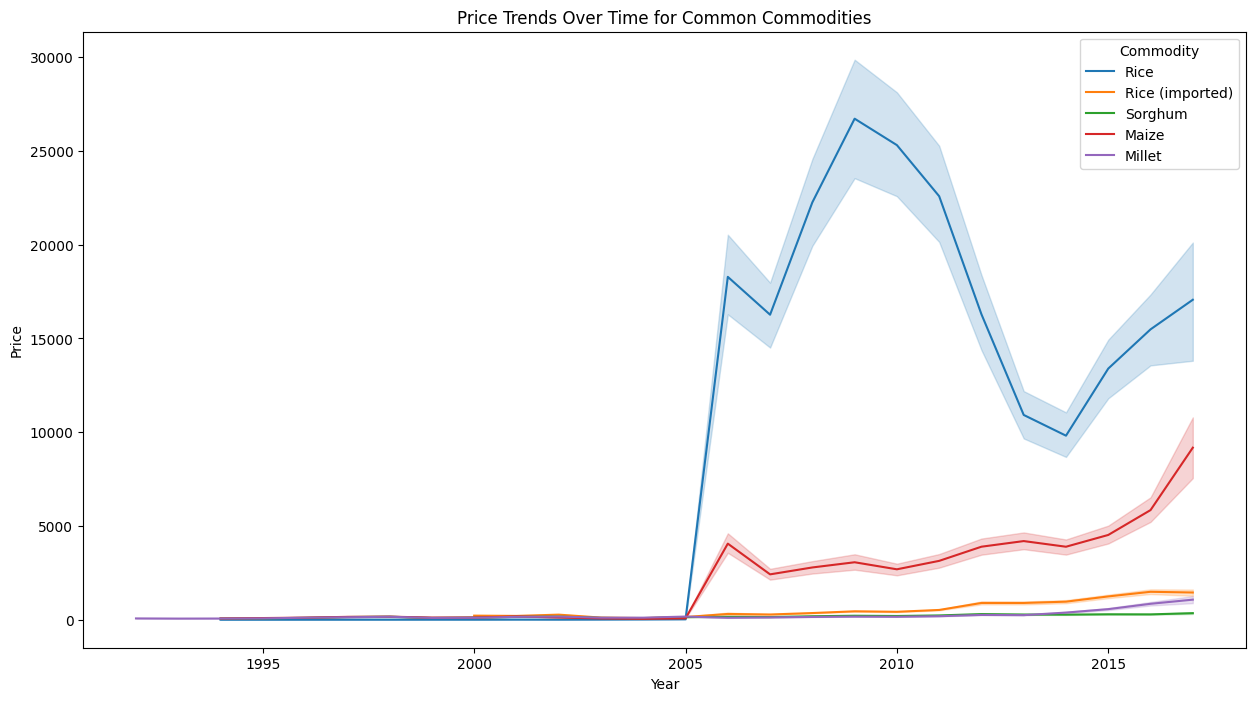

In [5]:
# Identify the most commonly occurring commodities
common_commodities = df['cm_name'].value_counts().head(5).index.tolist()

# Filter the data to include only these commodities
filtered_df = df[df['cm_name'].isin(common_commodities)]

# Plot the price trends over the years for these commodities
plt.figure(figsize=(15, 8))
sns.lineplot(data=filtered_df, x='mp_year', y='mp_price', hue='cm_name')
plt.title('Price Trends Over Time for Common Commodities')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Commodity')
plt.show()

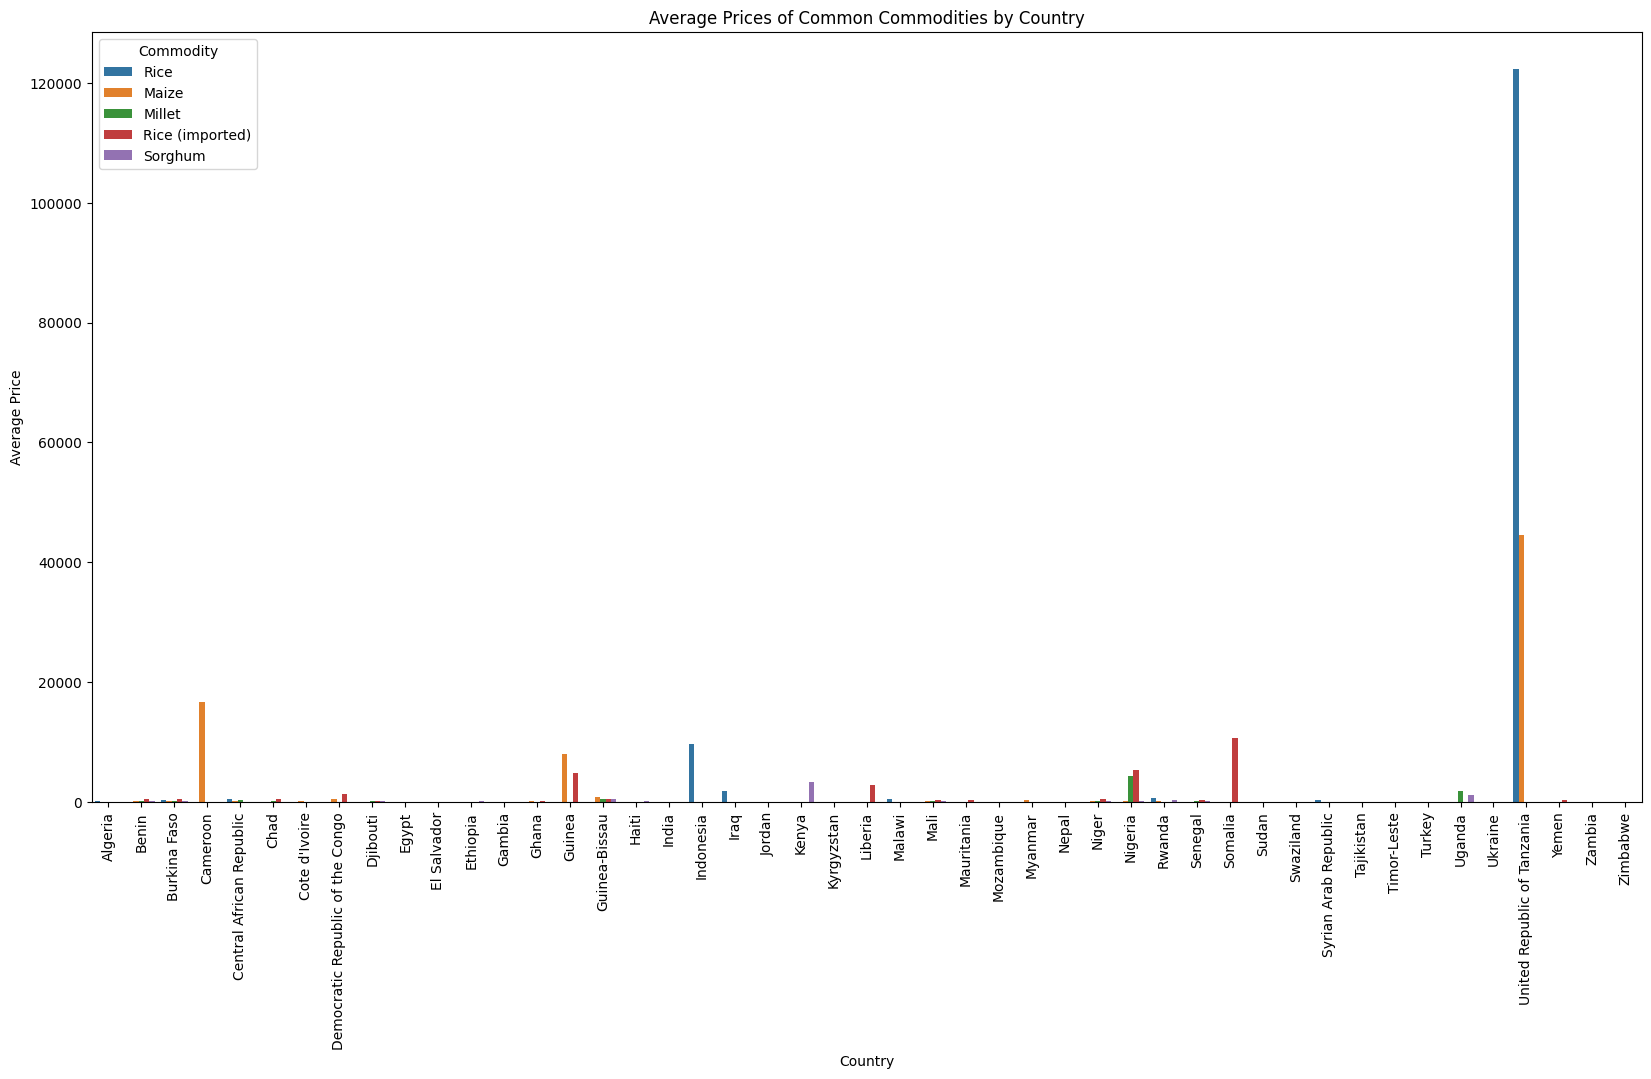

In [6]:
# Calculate the average price of the common commodities by country
avg_price_by_country = filtered_df.groupby(['adm0_name', 'cm_name'])['mp_price'].mean().reset_index()

# Plot the average prices across different countries for these commodities
plt.figure(figsize=(20, 10))
sns.barplot(data=avg_price_by_country, x='adm0_name', y='mp_price', hue='cm_name')
plt.title('Average Prices of Common Commodities by Country')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.legend(title='Commodity')
plt.show()

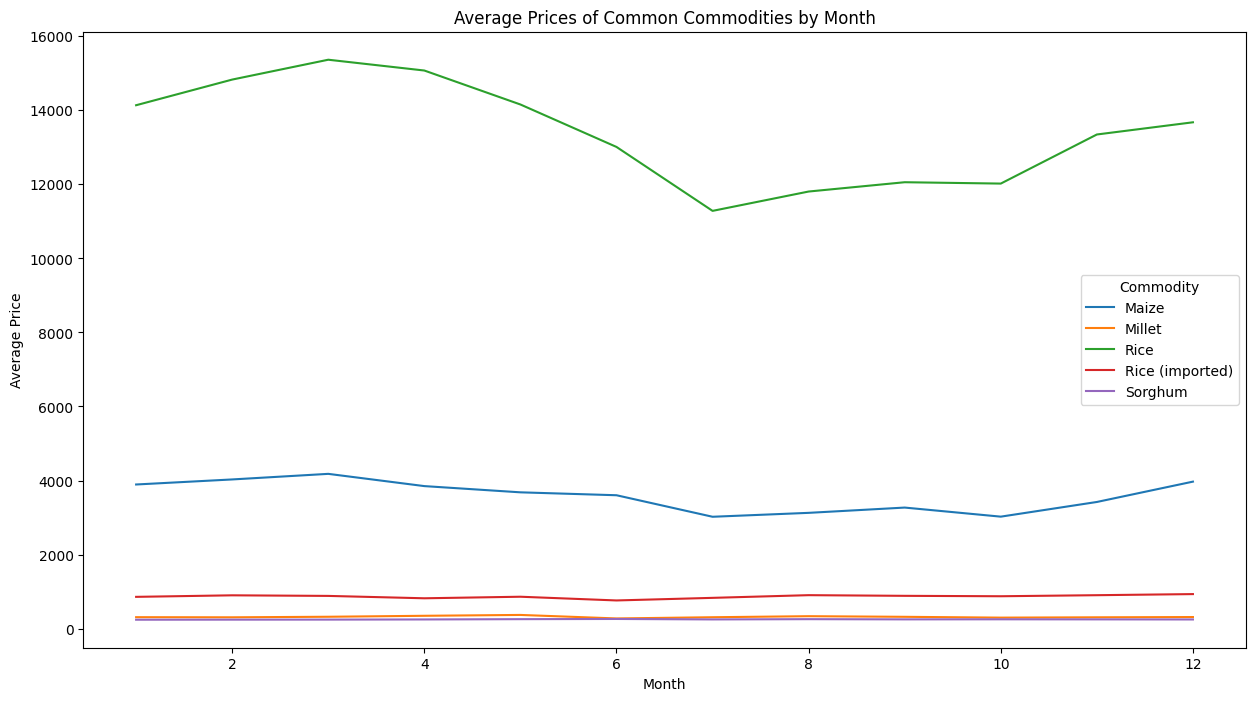

In [7]:
# Calculate the average price of the common commodities by month
avg_price_by_month = filtered_df.groupby(['mp_month', 'cm_name'])['mp_price'].mean().reset_index()

# Plot the average prices across different months for these commodities
plt.figure(figsize=(15, 8))
sns.lineplot(data=avg_price_by_month, x='mp_month', y='mp_price', hue='cm_name')
plt.title('Average Prices of Common Commodities by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Commodity')
plt.show()

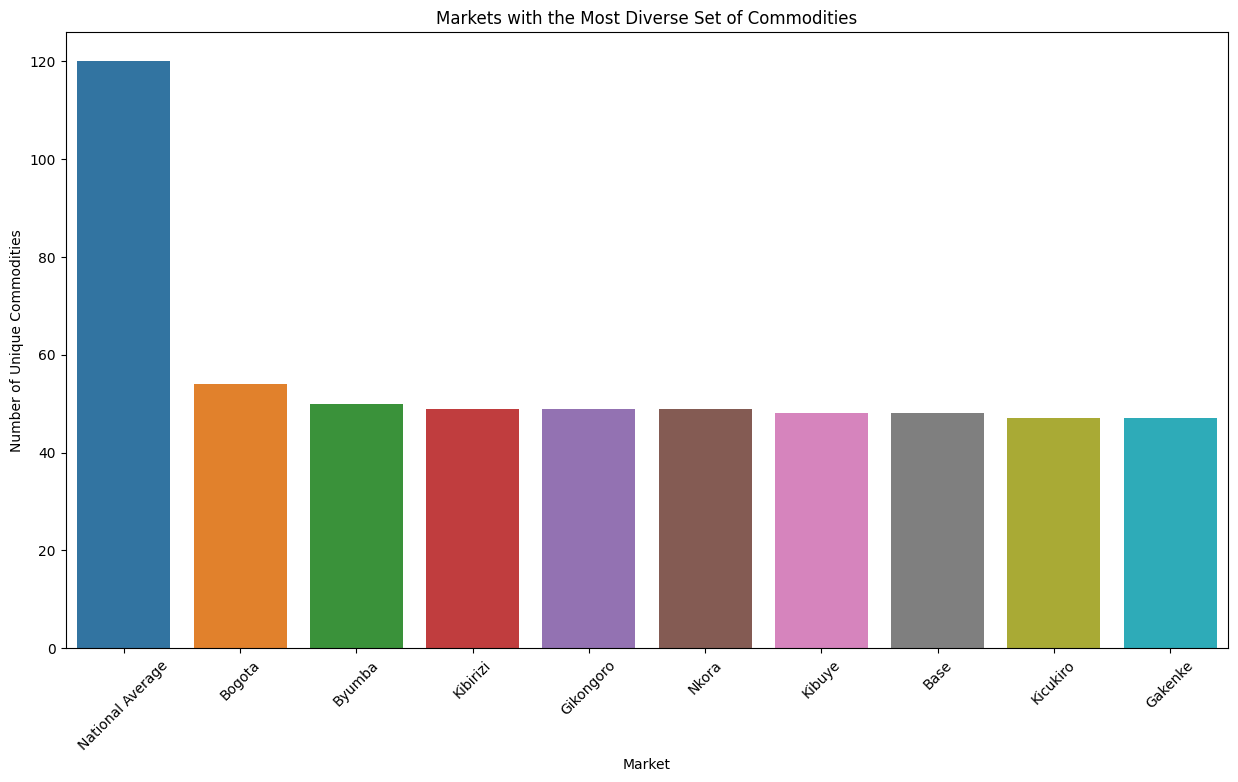

In [8]:
# Calculate the number of unique commodities available in each market
commodity_diversity = df.groupby('mkt_name')['cm_name'].nunique().reset_index()
commodity_diversity = commodity_diversity.sort_values(by='cm_name', ascending=False).head(10)

# Plot the markets with the most diverse set of commodities
plt.figure(figsize=(15, 8))
sns.barplot(data=commodity_diversity, x='mkt_name', y='cm_name')
plt.title('Markets with the Most Diverse Set of Commodities')
plt.xlabel('Market')
plt.ylabel('Number of Unique Commodities')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Identify a specific commodity and country for in-depth analysis
specific_commodity = common_commodities[0]
specific_country = df[df['cm_name'] == specific_commodity]['adm0_name'].value_counts().idxmax()

# Display the selected commodity and country
specific_commodity, specific_country

('Maize', 'Malawi')

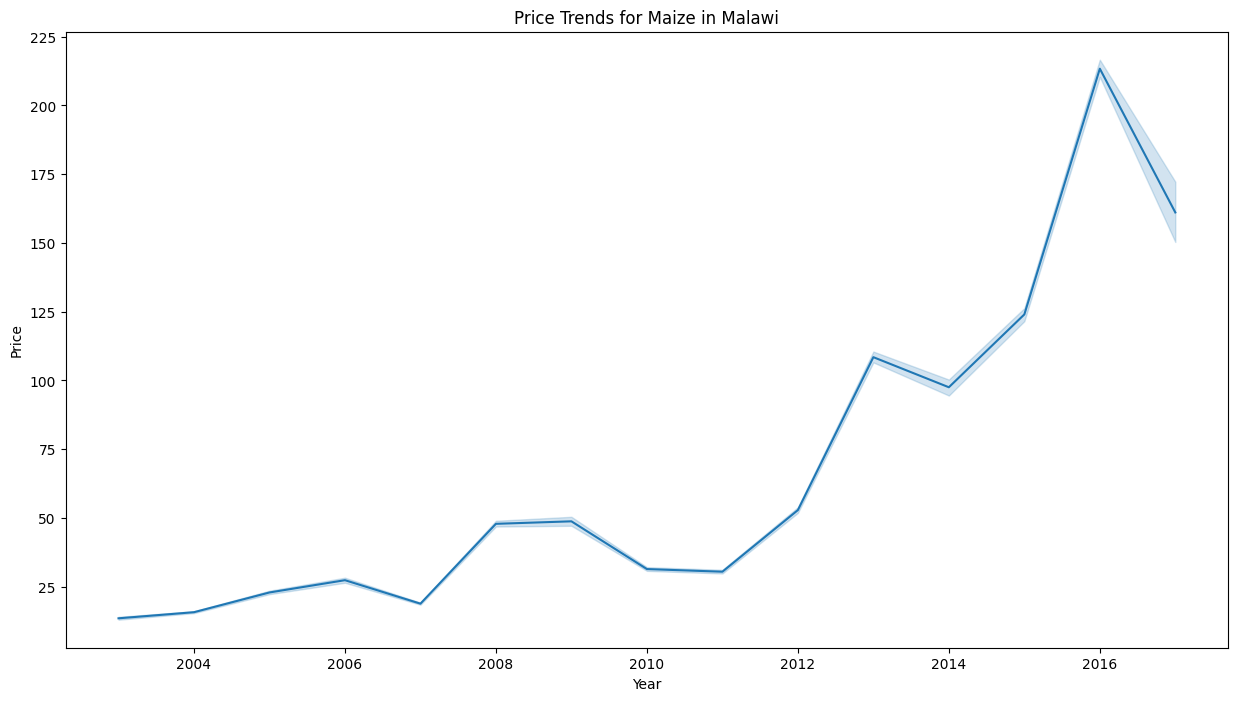

In [10]:
# Filter the data for Maize in Malawi
maize_malawi_df = df[(df['cm_name'] == 'Maize') & (df['adm0_name'] == 'Malawi')]

# Plot the price trends for Maize in Malawi
plt.figure(figsize=(15, 8))
sns.lineplot(data=maize_malawi_df, x='mp_year', y='mp_price')
plt.title('Price Trends for Maize in Malawi')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

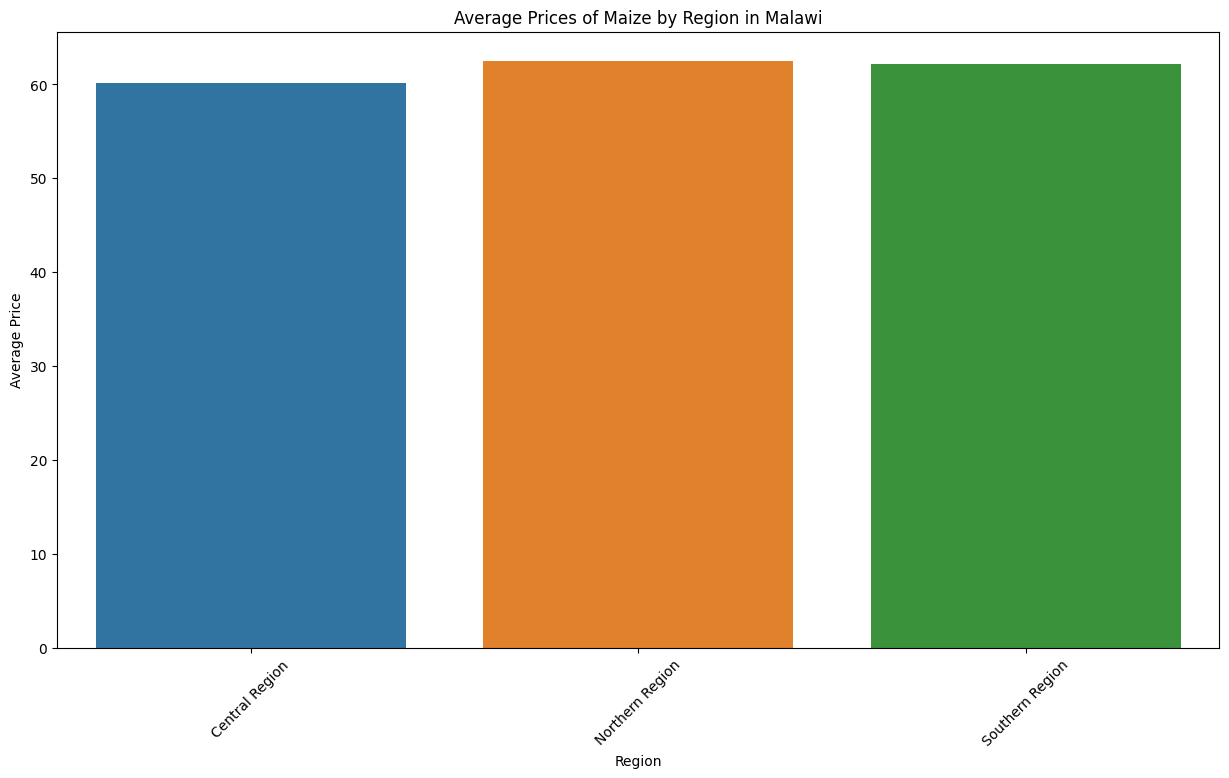

In [11]:
# Calculate the average price of Maize by region in Malawi
avg_price_by_region = maize_malawi_df.groupby('adm1_name')['mp_price'].mean().reset_index()

# Plot the average prices across different regions in Malawi
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_price_by_region, x='adm1_name', y='mp_price')
plt.title('Average Prices of Maize by Region in Malawi')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

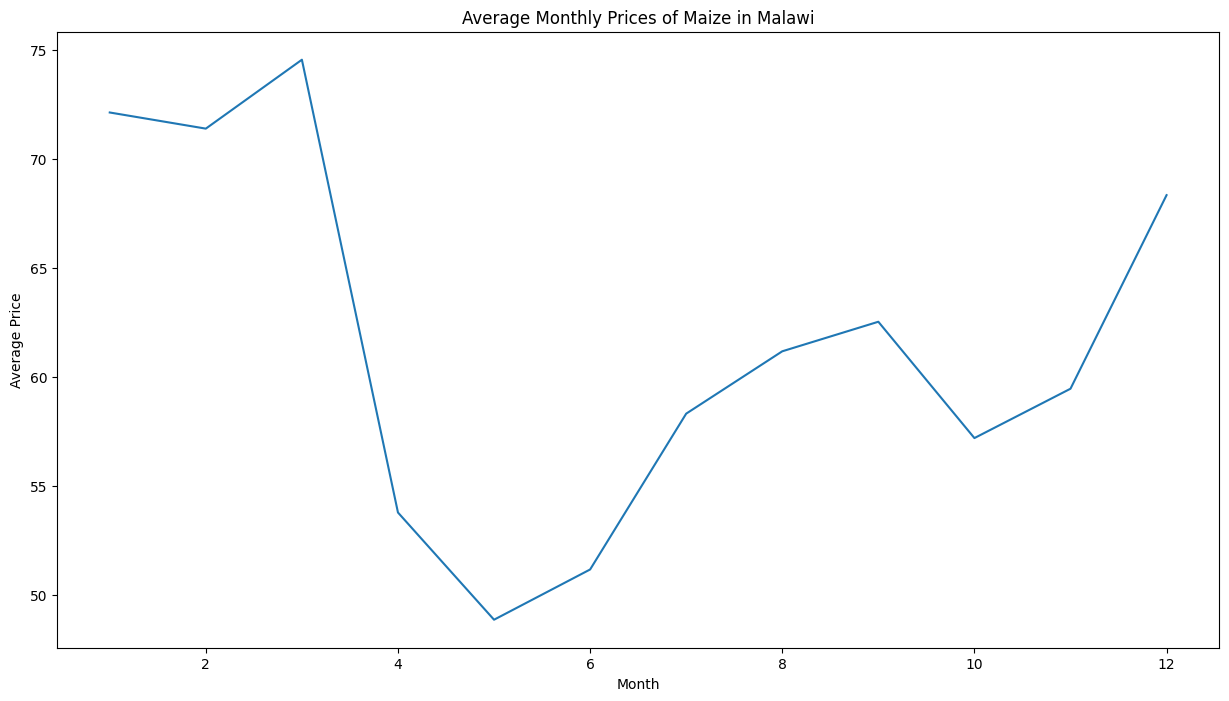

In [12]:
# Calculate the average monthly price of Maize in Malawi
avg_price_by_month_malawi = maize_malawi_df.groupby('mp_month')['mp_price'].mean().reset_index()

# Plot the average monthly prices of Maize in Malawi
plt.figure(figsize=(15, 8))
sns.lineplot(data=avg_price_by_month_malawi, x='mp_month', y='mp_price')
plt.title('Average Monthly Prices of Maize in Malawi')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

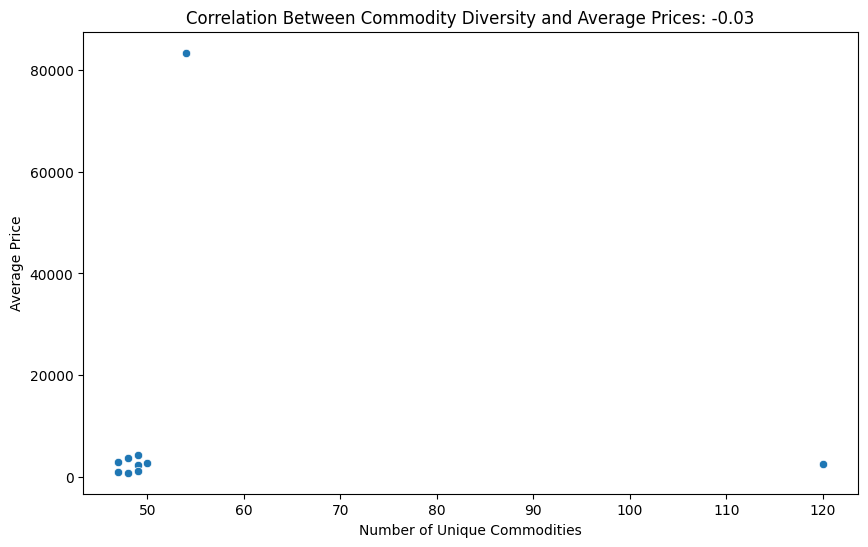

-0.030287448980182395

In [13]:
# Calculate the average price in each market
avg_price_by_market = df.groupby('mkt_name')['mp_price'].mean().reset_index()

# Merge the average price data with the commodity diversity data
merged_data = pd.merge(commodity_diversity, avg_price_by_market, left_on='mkt_name', right_on='mkt_name')

# Calculate the correlation between commodity diversity and average price
correlation = merged_data['cm_name'].corr(merged_data['mp_price'])

# Plot the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='cm_name', y='mp_price')
plt.title(f'Correlation Between Commodity Diversity and Average Prices: {correlation:.2f}')
plt.xlabel('Number of Unique Commodities')
plt.ylabel('Average Price')
plt.show()

# Display the correlation value
correlation

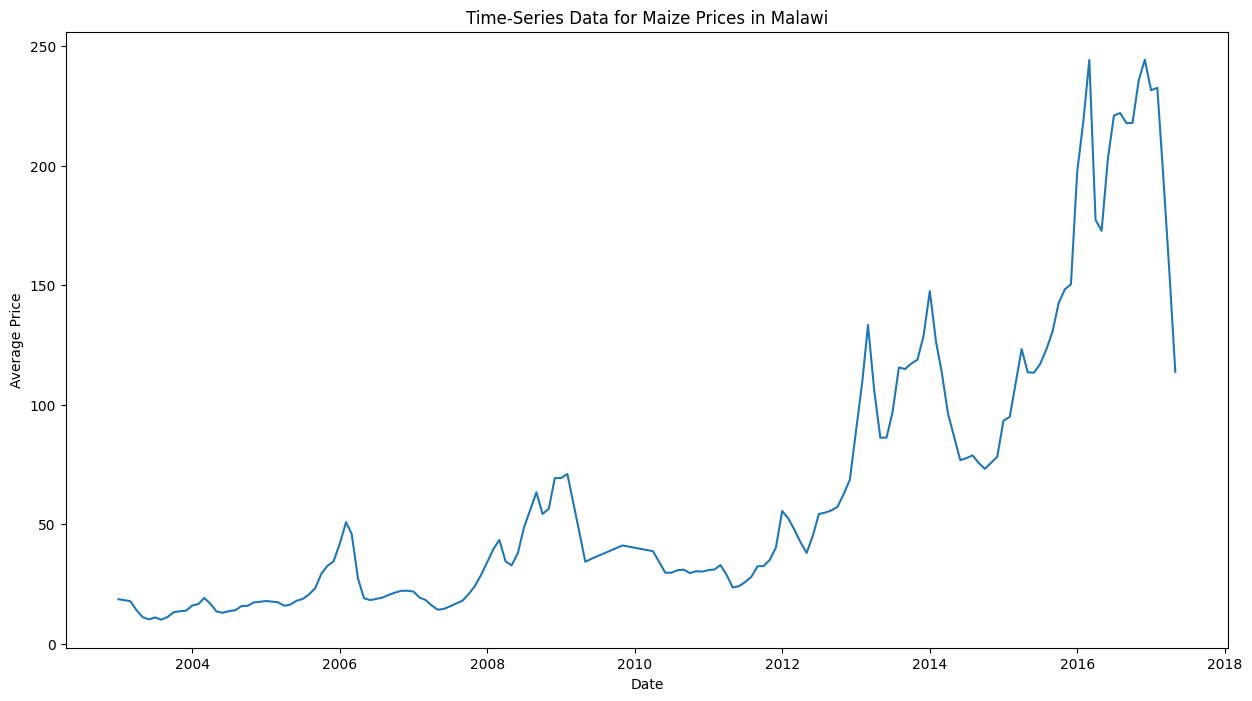

In [14]:
# Correct the date formatting and prepare the time-series data
time_series_data = maize_malawi_df.groupby(['mp_year', 'mp_month'])['mp_price'].mean().reset_index()
time_series_data['date'] = pd.to_datetime(time_series_data['mp_year'].astype(str) + '-' + time_series_data['mp_month'].astype(str) + '-01')
time_series_data.set_index('date', inplace=True)

# Plot the corrected time-series data
plt.figure(figsize=(15, 8))
plt.plot(time_series_data.index, time_series_data['mp_price'])
plt.title('Time-Series Data for Maize Prices in Malawi')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

In [17]:
# Prepare the data for correlation analysis
correlation_data = df[df['adm0_name'] == 'Malawi'][['cm_name', 'mp_year', 'mp_month', 'mp_price']]
correlation_data = correlation_data.pivot_table(index=['mp_year', 'mp_month'], columns='cm_name', values='mp_price').reset_index()

# Calculate the correlation matrix for maize and other commodities
correlation_matrix = correlation_data.corr()
maize_correlation = correlation_matrix['Maize'].sort_values(ascending=False)

# Display the top 5 commodities most correlated with maize
maize_correlation.head(6)[1:]

cm_name
Groundnuts (shelled)    0.868696
Rice                    0.859755
mp_year                 0.825036
Beans                   0.816831
Cassava                 0.427593
Name: Maize, dtype: float64